In [25]:
import sys
sys.path.append("..") 
import pandas as pd
import logging

# advanced fraud

# 1. Imports & Setup
import pandas as pd
import numpy as np



In [26]:
# 2. Load Cleaned Data
fraud_df = pd.read_parquet("../data/processed/fraud_data_basic_features.parquet")
credit_df = pd.read_parquet("../data/processed/creditcard_data_cleaned.parquet")
print(fraud_df.shape)
fraud_df.head()

(151112, 17)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_since_signup,hour_of_day,day_of_week,user_transaction_count,device_transaction_count,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1251.856111,2,5,1,1,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,4.984444,1,0,1,1,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.000278,18,3,1,12,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,136.690278,13,0,1,1,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1211.516944,18,2,1,1,United States


INFO:root:✅ Added 'time_to_purchase'
INFO:root:✅ Added 'high_value_transaction' (threshold=100)
INFO:root:✅ Added 'device_transaction_count'


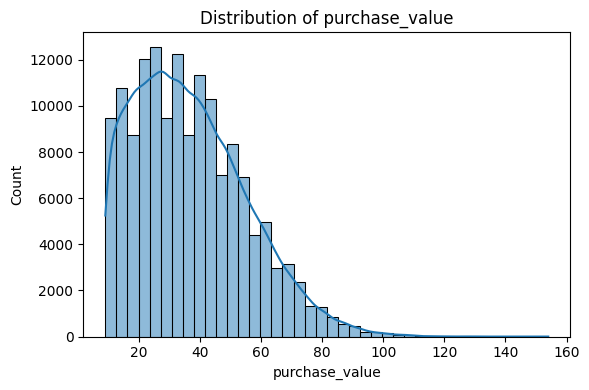

INFO:root:✅ Plotted purchase_value distribution.


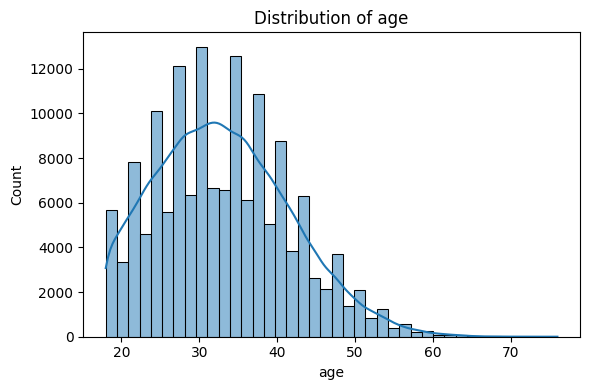

INFO:root:✅ Plotted age distribution.


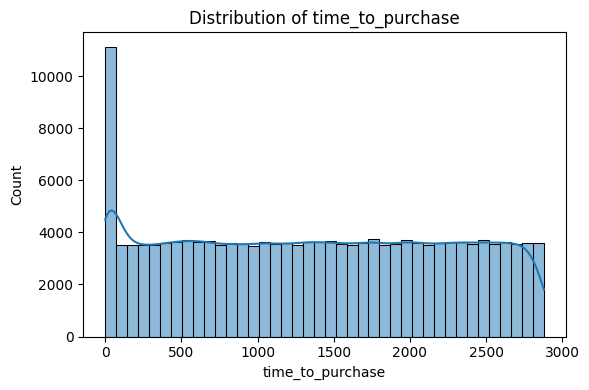

INFO:root:✅ Plotted time_to_purchase distribution.


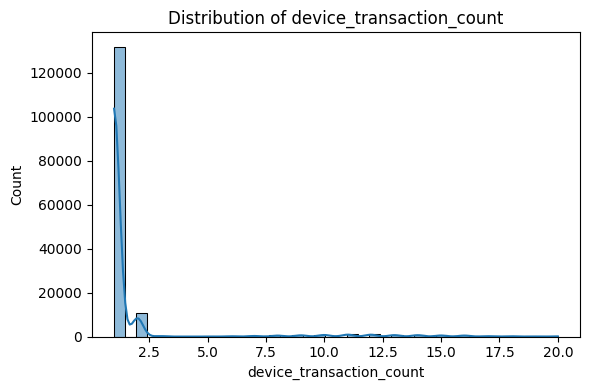

INFO:root:✅ Plotted device_transaction_count distribution.
INFO:root:✅ Advanced feature engineering with plots completed.


In [27]:
from src.advanced_feature_engineering import apply_advanced_feature_engineering_with_plots
fraud_df = apply_advanced_feature_engineering_with_plots(fraud_df, threshold=100, save_plots=True)

In [28]:
import os
#  Save Final Feature-Engineered Dataset
output_dir = "../data/processed/"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "fraud_data_features_final.parquet")
fraud_df.to_parquet(output_path, index=False)
logging.info(f" Saved combined feature-engineered data to {output_path}")

INFO:root: Saved combined feature-engineered data to ../data/processed/fraud_data_features_final.parquet
